<a href="https://colab.research.google.com/github/jucaguirrero/AlgorithmsUN2020II/blob/master/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo 15  lab 10 Bubble Sort

Julio Cesar Aguirre Rojas/
Santiago Arias Bareño/
Adriano Ramon Hernandez/


In [11]:
from itertools import permutations 
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter


In [12]:

def permutacion(v):
  permuatacion=permutations(v)
  return permuatacion

In [13]:
def cambios(v,i,j):
  t=v[i]
  v[i]=v[j]
  v[j]=t

  

In [8]:
def bubblesort(v):
  pasos=0
  flag=0
  cadena=v  
  xr=range(0,len(cadena))
  cadenabase=list(xr)
  
  for i in range(len(cadenabase)):
      for j in reversed(cadenabase):

        if flag >= len(cadena)-1:
          return pasos
        
        if j >=i+1:
          pasos=pasos+1
          if cadena[j]<cadena[j-1]:
            cambios(cadena,j,j-1)
            pasos=pasos+1
          else:
            flag+=1
      flag=0 
  
  return pasos

  



Enter n:3
Pasos promedio:  4.333333333333333 Total pasos:  26 Permutaciones:  6
Frecuencia de los pasos:  [0, 0, 1, 0, 2, 2, 1, 0, 0]
Probabilidad de la frecuencia [0.0, 0.0, 0.16666666666666666, 0.0, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 0.0, 0.0]
Pasos en cada permutacion:  [2, 4, 4, 5, 5, 6]


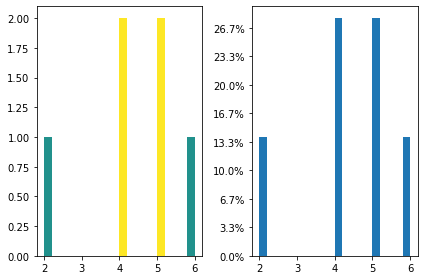

In [14]:
mensaje = "ingrese n:"
n = input(mensaje)
c = range(1,int(n)+1)
v=list(c)
pasos=0
tamano=0
frec=[]
frec2=[]

for j in range(0, int(n)*int(n)):
  frec.append(0)

permuta = permuatacion(v)

for i in list(permuta):
  
  pasos += bubblesort(list(i))
  frec[bubblesort(list(i))] += 1
  frec2.append(bubblesort(list(i)))
  tamano=tamano+1

print("Pasos promedio: ",pasos/tamano, "Total pasos: ",pasos,"Permutaciones: ",tamano)

frecp=[]

for i in frec:
  frecp.append(i/tamano) 

print("Frecuencia de los pasos: ",frec)
print("Probabilidad de la frecuencia",frecp)

print("Pasos en cada permutacion: ",frec2)

N_points = 100000
n_bins = 20

x = frec2

fig, axs = plt.subplots(1, 2, tight_layout=True)


N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=max(frec2)))


